In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from vistats import barplot_annotate_brackets

In [3]:
contents = np.arange(0, 20, 1).reshape((10, 2))

In [4]:
target_data_df = pd.DataFrame(
    contents, columns=["a", "b"]
)
# if you load csv file
# target_data_df = pd.read_csv("<input_your_file_name>.csv")

In [5]:
# Calculating mean and standard error
means, sems = target_data_df.mean().values, target_data_df.sem().values

In [6]:
# input your asterisks.
asterisk_tuples = [(0, 1, "*")]

Text(0.5, 0, 'method')

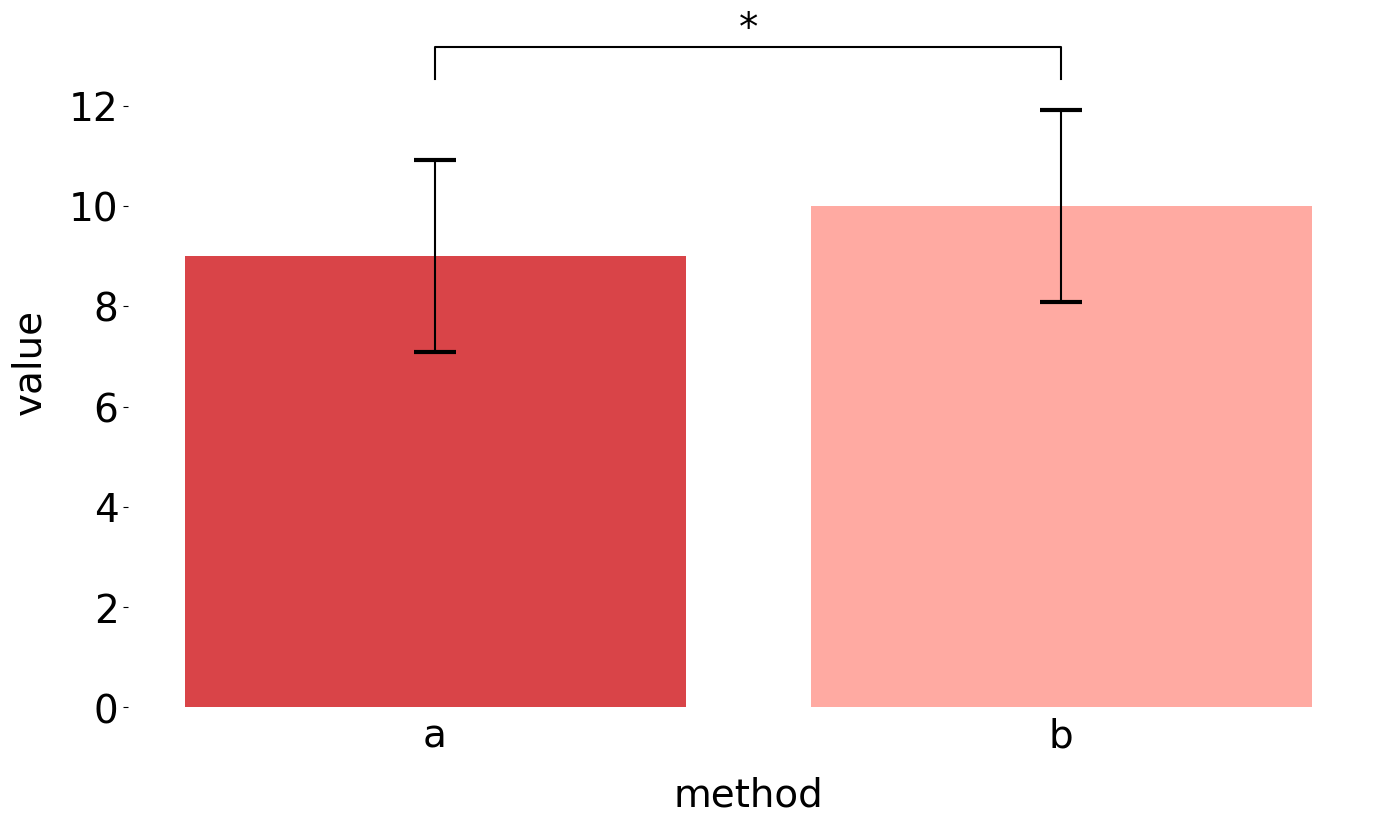

In [15]:
# You can use barplot_annotate_brackets like plt.bar, plt.plot, and etc. 
plt.figure(figsize=(16, 9))
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.tick_params(bottom=False, labelsize=28)
bars = np.arange(len(target_data_df.columns))
# plt.grid(axis="y")
plt.bar(
    bars, means,
    tick_label=target_data_df.columns.tolist(),
    yerr=sems,
    capsize=15.0,
    error_kw={"capthick": 3.0},
    align='center',
    color=["#d94448", "#ffaaa2", "#2b3955", "#406c93", "#92b7c0"]
)

# run the function after plt.bar
barplot_annotate_brackets(asterisk_tuples, bars, means.tolist(), yerr=sems.tolist(), offset_basis=0, fs=28)

plt.ylabel("value", labelpad=15, fontsize=28)
plt.xlabel("method", labelpad=15, fontsize=28)